# Cats vs Dogs AI

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
train, _ = tfds.load('cats_vs_dogs', split=['train[:100%]'], with_info=True, as_supervised=True)

In [ ]:
SIZE = (224, 224)

def resize_image(img, label):
    img = tf.cast(img, tf.float32)
    img = tf.image.resize(img, SIZE)
    img /= 255.0
    return img, label

In [ ]:
train_resized = train[0].map(resize_image)
train_batches = train_resized.shuffle(1000).batch(16)

In [ ]:
base_layers = tf.keras.applications.MobileNetV2(input_shape=(SIZE[0], SIZE[1], 3), include_top=False)

In [ ]:
model = tf.keras.Sequential([
    base_layers,
    GlobalAveragePooling2D(),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
model.fit(train_batches, epochs=20)

In [ ]:
files.upload()

In [ ]:
images = ['1.jpeg', '2.jpg', '3.jpeg', '4.jpeg', '5.jpeg', '6.jpeg']

1/1 [==============================] - 0s 24ms/step


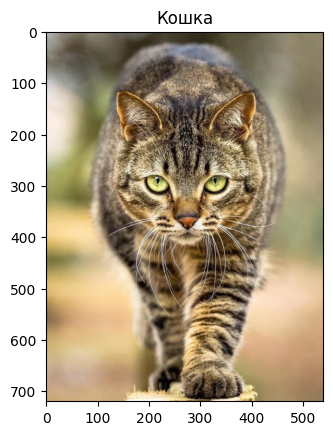

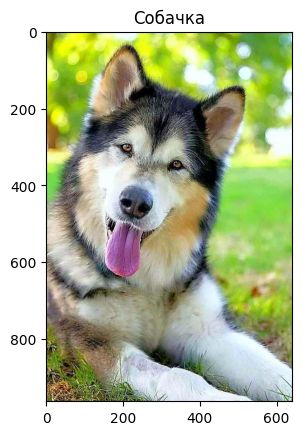

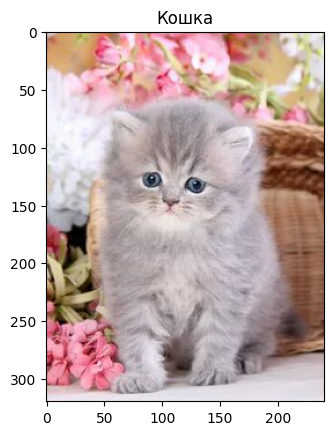

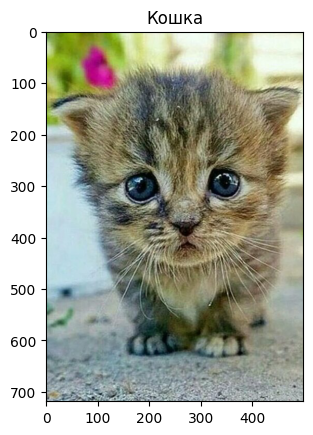

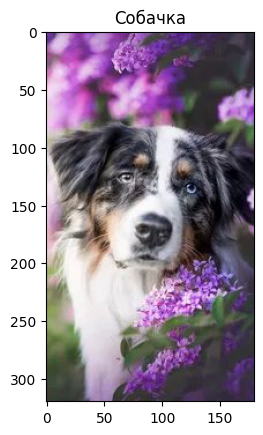

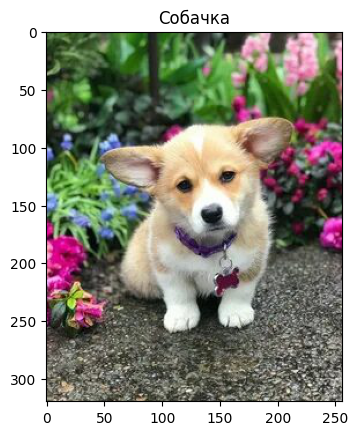

In [ ]:
for i in images:

    img = load_img(i)
    img_array = img_to_array(img)
    img_resized, _ = resize_image(img_array, _)
    img_expended = np.expand_dims(img_resized, axis=0)
    prediction = model.predict(img_expended)
    plt.figure()
    plt.imshow(img)
    label = 'Собачка' if prediction > 0 else 'Кошка'
    plt.title('{}'.format(label))